### HOJA DE TRABAJO 2
Erwin Edgardo Castro Gramajo

Problema #1: 

Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

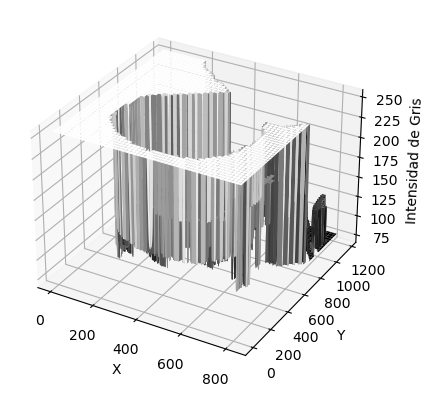

In [9]:
def imagen_grises_3d(imagen):
    # Se obtienen las dimensiones
    height, width = imagen.shape
    
    # Se crean y definen las coordenadas del plano cartesiano e intensidad de grises de la imagen
    x = np.arange(0, width, 1)
    y = np.arange(0, height, 1)
    x, y = np.meshgrid(x, y)
    z = imagen
    
    # Crear una figura en tres dimensiones y graficar
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='gray')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad de Gris')
    
    plt.show()

# Carga de imagen con escala de grises
imagen = plt.imread('ImagenP1.jpg')

imagen_grises_3d(imagen)


Problema #2:

Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

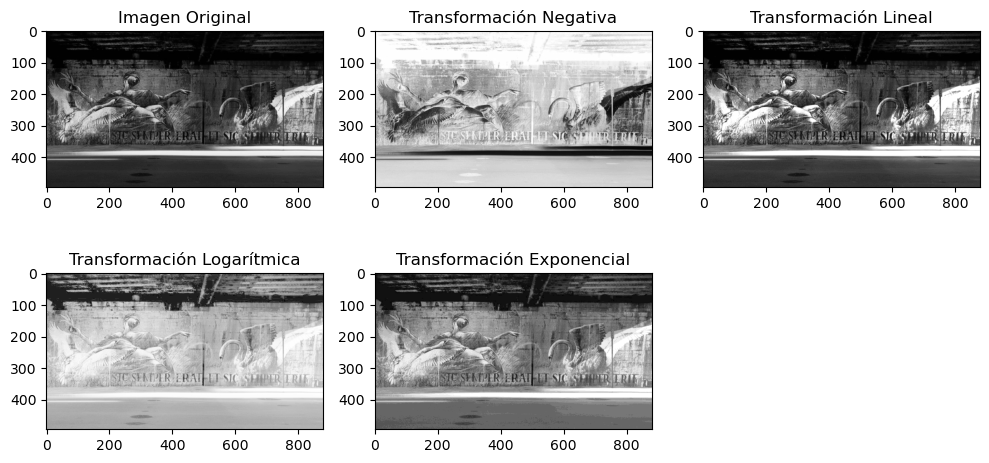

In [14]:

# Función para transformación negativa

def transformacion_negativa(imagen):
    trans_imagen_negativa = 255 - imagen
    return trans_imagen_negativa

# Función para transformación lineal

def transformacion_lineal(imagen, alpha, beta):
    trans_imagen_lineal = cv2.convertScaleAbs(imagen, alpha=alpha, beta=beta)
    return trans_imagen_lineal

# Función para transformación logarítmica

def transformacion_logaritmica(imagen, c=1):
    trans_imagen_log = c * np.log1p(imagen)
    trans_imagen_log = np.uint8(trans_imagen_log)
    return trans_imagen_log

# Función para transformación exponencial

def transformacion_exponencial(imagen, gamma=1):
    trans_imagen_exp = np.power(imagen, gamma)
    trans_imagen_exp = np.uint8(trans_imagen_exp)
    return trans_imagen_exp

# Cargar la imagen
imagen_original = cv2.imread('ImagenP2.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar las transformaciones
imagen_negativa = transformacion_negativa(imagen_original)
imagen_lineal = transformacion_lineal(imagen_original, alpha=1.2, beta=30)
imagen_logaritmica = transformacion_logaritmica(imagen_original, c=30)
imagen_exponencial = transformacion_exponencial(imagen_original, gamma=0.5)

# Mostrar las imágenes originales y transformadas
plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.imshow(imagen_original, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 3, 2)
plt.imshow(imagen_negativa, cmap='gray')
plt.title('Transformación Negativa')

plt.subplot(2, 3, 3)
plt.imshow(imagen_lineal, cmap='gray')
plt.title('Transformación Lineal')

plt.subplot(2, 3, 4)
plt.imshow(imagen_logaritmica, cmap='gray')
plt.title('Transformación Logarítmica')

plt.subplot(2, 3, 5)
plt.imshow(imagen_exponencial, cmap='gray')
plt.title('Transformación Exponencial')

plt.tight_layout()
plt.show()

Problema #3:

Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [20]:

def ope_imagenes(imagen1, imagen2):
    # Redimensionar las imágenes para que tengan las mismas dimensiones
    height = min(imagen1.shape[0], imagen2.shape[0])
    width = min(imagen1.shape[1], imagen2.shape[1])
    imagen1 = cv2.resize(imagen1, (width, height))
    imagen2 = cv2.resize(imagen2, (width, height))

    # Convertir las imágenes a escala de grises
    imagen_gris1 = cv2.cvtColor(imagen1, cv2.COLOR_BGR2GRAY)
    imagen_gris2 = cv2.cvtColor(imagen2, cv2.COLOR_BGR2GRAY)

    # Binarizar las imágenes
    _, bin_image1 = cv2.threshold(imagen_gris1, 128, 255, cv2.THRESH_BINARY)
    _, bin_image2 = cv2.threshold(imagen_gris2, 128, 255, cv2.THRESH_BINARY)

    # Realizar las operaciones aritmeticas
    imagen_suma  = cv2.add(imagen1, imagen2)
    imagen_resta = cv2.subtract(imagen1, imagen2)

    # Realizar las operaciones aritmeticas
    imagen_and = cv2.bitwise_and(bin_image1, bin_image2)
    imagen_or  = cv2.bitwise_or(bin_image1, bin_image2)
    imagen_xor = cv2.bitwise_xor(bin_image1, bin_image2)

    return imagen_suma, imagen_resta, imagen_and, imagen_or, imagen_xor

# Cargar las imágenes
imagen1 = cv2.imread('ImagenP3_1.jpg')
imagen2 = cv2.imread('ImagenP3_2.jpg')

# Realizar las operaciones
imagen_suma, imagen_resta, imagen_and, imagen_or, imagen_xor = ope_imagenes(imagen1, imagen2)


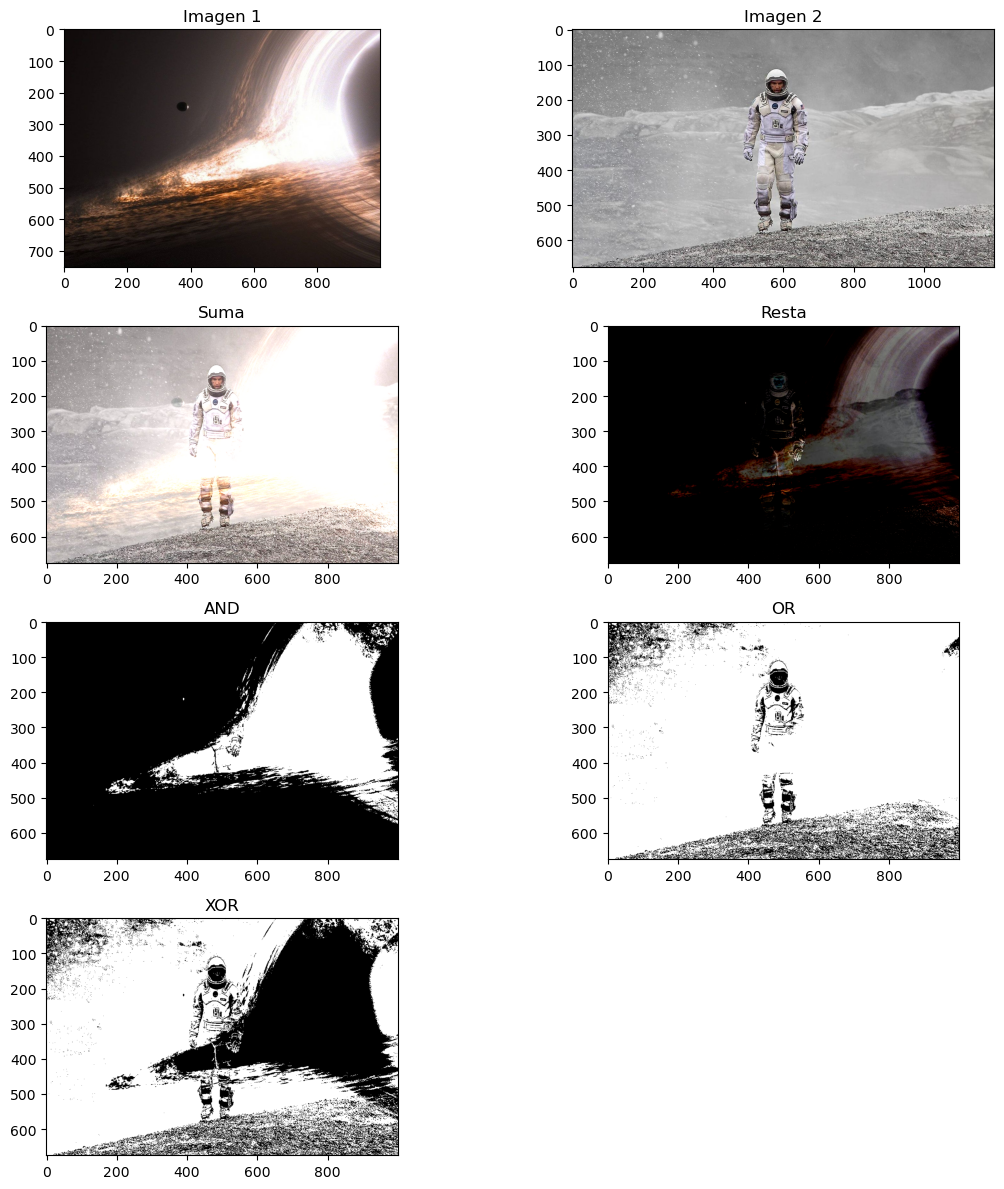

In [24]:

# Mostrar las imágenes originales y los resultados
plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.imshow(cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB))
plt.title('Imagen 1')

plt.subplot(4, 2, 2)
plt.imshow(cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB))
plt.title('Imagen 2')

plt.subplot(4, 2, 3)
plt.imshow(cv2.cvtColor(imagen_suma, cv2.COLOR_BGR2RGB))
plt.title('Suma')

plt.subplot(4, 2, 4)
plt.imshow(cv2.cvtColor(imagen_resta, cv2.COLOR_BGR2RGB))
plt.title('Resta')

plt.subplot(4, 2, 5)
plt.imshow(imagen_and, cmap='gray')
plt.title('AND')

plt.subplot(4, 2, 6)
plt.imshow(imagen_or, cmap='gray')
plt.title('OR')

plt.subplot(4, 2, 7)
plt.imshow(imagen_xor, cmap='gray')
plt.title('XOR')

plt.tight_layout()
plt.show()


Problema #4:

Realice una comparación entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparación entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque

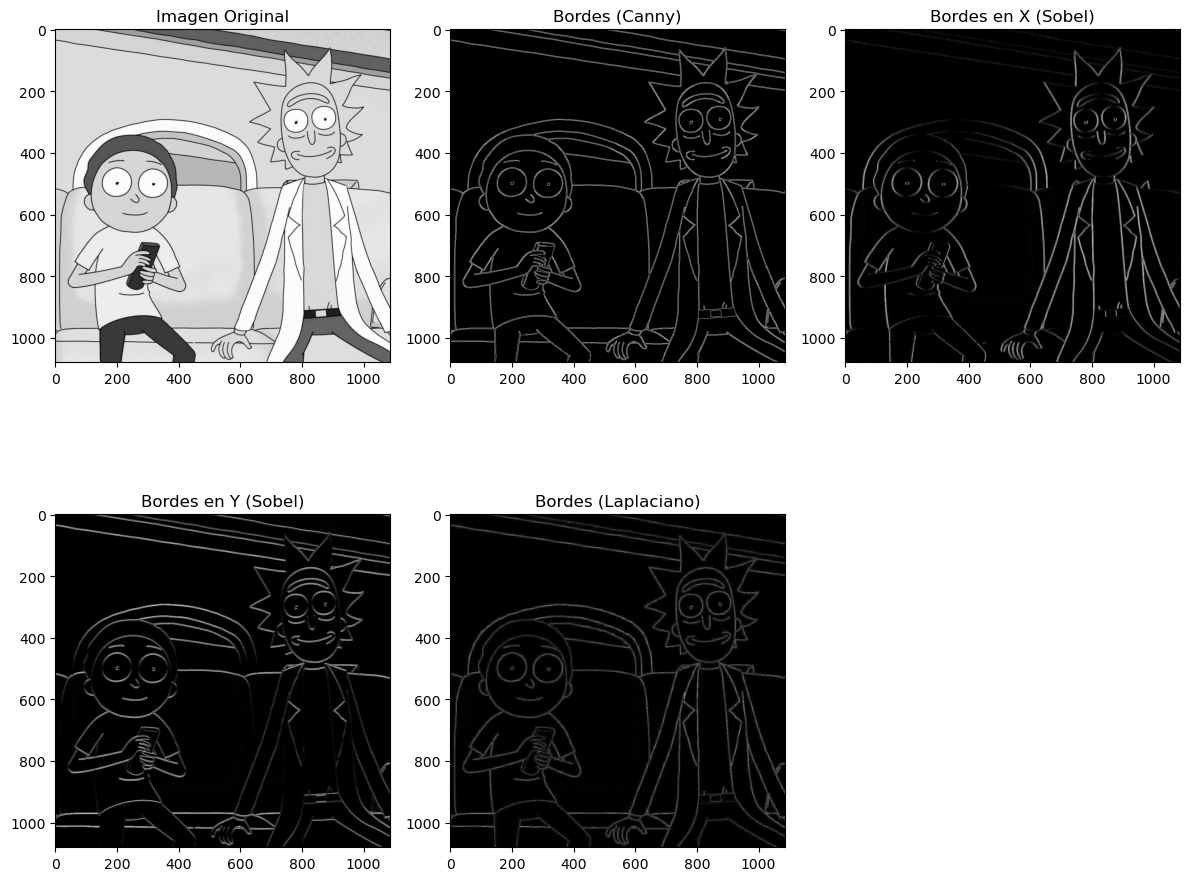

In [26]:
# Cargar la imagen
imagen = cv2.imread('ImagenP4.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar los enfoques requeridos
canny_edges = cv2.Canny(imagen, threshold1=100, threshold2=200)
sobel_x = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=3)
laplacian = cv2.Laplacian(imagen, cv2.CV_64F)

# Mostrar resultados
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 3, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Bordes (Canny)')

plt.subplot(2, 3, 3)
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Bordes en X (Sobel)')

plt.subplot(2, 3, 4)
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Bordes en Y (Sobel)')

plt.subplot(2, 3, 5)
plt.imshow(np.abs(laplacian), cmap='gray')
plt.title('Bordes (Laplaciano)')

plt.tight_layout()
plt.show()

Problema #5:

Utilizando funciones de OpenCV deberá aplicar los filtros de convolución de tamaño de kernel (3x3,5x5 y 7x7) las operaciones que deberá realizar son las siguientes: 1.Kernel Gaussiano de riodo. 2.Kernel Box de ruido. 3.Kernel de mediana para ruido. 4.Kernel Sobel para detección de bornes (en X e Y). 5.Kernel Lapaciano para detección de bordes. 6.Kernel de realce (Sharpening). 7.Kernel de relieve (Embossing).

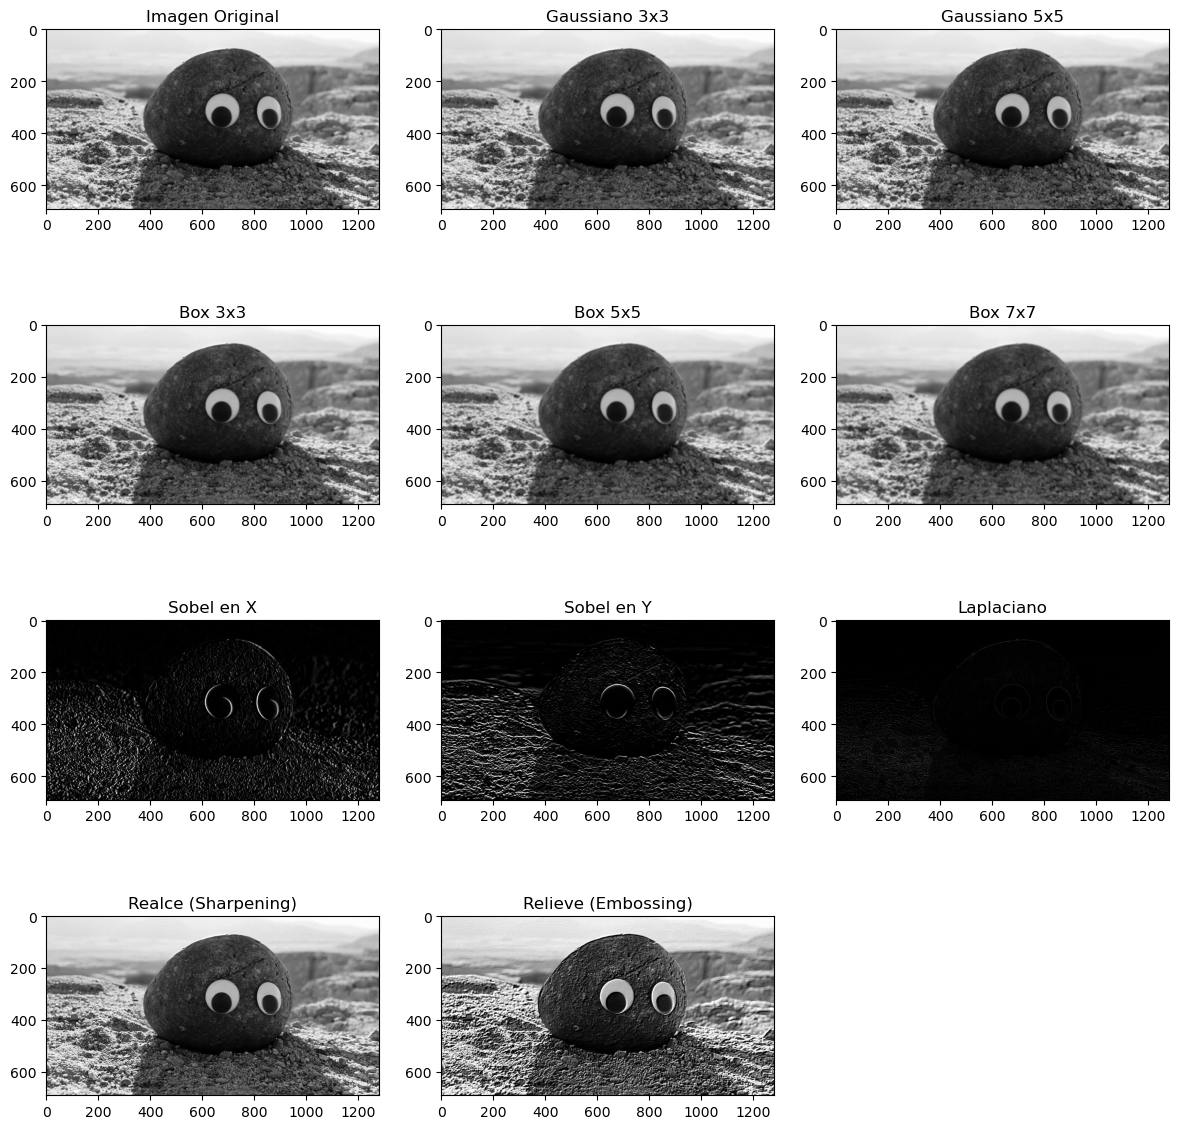

In [29]:

# Definir kernels
gaussian_kernel_3x3 = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]]) / 16.0

gaussian_kernel_5x5 = cv2.getGaussianKernel(5, 0)

box_kernel_3x3 = np.ones((3, 3), dtype=np.float32) / 9.0
box_kernel_5x5 = np.ones((5, 5), dtype=np.float32) / 25.0
box_kernel_7x7 = np.ones((7, 7), dtype=np.float32) / 49.0

sobel_kernel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_kernel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

laplacian_kernel = np.array([[0, 1, 0],
                            [1, -4, 1],
                            [0, 1, 0]])

sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

embossing_kernel = np.array([[-2, -1, 0],
                             [-1, 1, 1],
                             [0, 1, 2]])

# Cargar la imagen en escala de grises
imagen = cv2.imread('ImagenP5.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar los filtros de convolución
gaussian_3x3 = cv2.filter2D(imagen, -1, gaussian_kernel_3x3)
gaussian_5x5 = cv2.filter2D(imagen, -1, gaussian_kernel_5x5)
box_3x3 = cv2.filter2D(imagen, -1, box_kernel_3x3)
box_5x5 = cv2.filter2D(imagen, -1, box_kernel_5x5)
box_7x7 = cv2.filter2D(imagen, -1, box_kernel_7x7)
sobel_x = cv2.filter2D(imagen, -1, sobel_kernel_x)
sobel_y = cv2.filter2D(imagen, -1, sobel_kernel_y)
laplacian = cv2.filter2D(imagen, -1, laplacian_kernel)
sharpened = cv2.filter2D(imagen, -1, sharpening_kernel)
embossed = cv2.filter2D(imagen, -1, embossing_kernel)

# Crear una figura con varias subtramas para mostrar los resultados
plt.figure(figsize=(12, 12))

plt.subplot(4, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(4, 3, 2)
plt.imshow(gaussian_3x3, cmap='gray')
plt.title('Gaussiano 3x3')

plt.subplot(4, 3, 3)
plt.imshow(gaussian_5x5, cmap='gray')
plt.title('Gaussiano 5x5')

plt.subplot(4, 3, 4)
plt.imshow(box_3x3, cmap='gray')
plt.title('Box 3x3')

plt.subplot(4, 3, 5)
plt.imshow(box_5x5, cmap='gray')
plt.title('Box 5x5')

plt.subplot(4, 3, 6)
plt.imshow(box_7x7, cmap='gray')
plt.title('Box 7x7')

plt.subplot(4, 3, 7)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel en X')

plt.subplot(4, 3, 8)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel en Y')

plt.subplot(4, 3, 9)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplaciano')

plt.subplot(4, 3, 10)
plt.imshow(sharpened, cmap='gray')
plt.title('Realce (Sharpening)')

plt.subplot(4, 3, 11)
plt.imshow(embossed, cmap='gray')
plt.title('Relieve (Embossing)')

plt.tight_layout()
plt.show()